## 1. 합법과 불법 데이터를 판별하는 모델 생성
- 불법 대부업 데이터 폴더에는 모두 대출과 관련된 내용이나,
- 정부로부터 인가받은 업체가 홍보한 합법적인 글(class0)과 인가받지 않은 업체가 홍보한 불법적인 글(class1)이 있다
- 두 데이터를 합쳐 학습 데이터와 테스트 데이터를 7.5:2.5의 비율로 분리하고(random_state=1111)
- 딥러닝을 이용하여 분류 모델을 생성하시오
- train 데이터의 30%로 validation 데이터를 만드시오
- 형태소 분석은 이미 되어 있음
- 모델 저장 및 불러오기 과정과
- 1개 데이터 예측도 수행하시오

In [2]:
import os
import pandas as pd

path = 'D:\elice_python\GAS_5\pytest\datasets\불법 대부업 데이터'

os.chdir(path)
os.getcwd()

'D:\\elice_python\\GAS_5\\pytest\\datasets\\불법 대부업 데이터'

In [6]:
data0 = pd.read_csv('class0(대출_합법).csv', header=0, encoding = 'cp949')
data0.head(2)

,Content,Label
0,그라나다 할부 조건 시간 전국 어디 중고차 할부 가능 여부 서비스 상담 신청 양식 ...,class0
1,광고 광고 올해 통신 인터넷 보이스 피싱 메모리 해킹 사기 피해 건수 피해액 최민희...,class0


In [7]:
data1 = pd.read_csv('class1(대출_불법).csv', header=0, encoding='cp949')
data1.head(2)

,Content,Label
0,저지 레드 다중 과다 채무자 증가 카드 대출 연체 증가,class1
1,히트 로드 채팅 싸이트 은행 신협 고객 연체 이자 부담,class1


In [10]:
data0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2985 entries, 0 to 2984
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Content  2985 non-null   object
 1   Label    2985 non-null   object
dtypes: object(2)
memory usage: 46.8+ KB


In [11]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1413 entries, 0 to 1412
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Content  1413 non-null   object
 1   Label    1413 non-null   object
dtypes: object(2)
memory usage: 22.2+ KB


In [13]:
data = pd.concat([data0,data1])

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4398 entries, 0 to 1412
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Content  4398 non-null   object
 1   Label    4398 non-null   object
dtypes: object(2)
memory usage: 103.1+ KB


In [16]:
data.Label.unique()

array(['class0', 'class1'], dtype=object)

In [17]:
data['Label'] = data['Label'].replace({'class0': 0, 'class1': 1})

In [18]:
data.Label.unique()

array([0, 1], dtype=int64)

In [33]:
text = data.Content
label = data.Label

In [51]:
from sklearn.model_selection import train_test_split
train_text, test_text, train_label, test_label = train_test_split(
    text, label, stratify=label, random_state=1111
)
train_text.shape, train_label.shape, test_text.shape, test_label.shape

((3298,), (3298,), (1100,), (1100,))

In [35]:
train_text

1311         신용 불량자 급전 현금 방법 본인 명의 부폰 방법 전국 출장 가능 스마트 모바일
539                       개인 회생 신용 불량 신협 아파트 담보 대출 출처 네이버
1337    뉴스 기사 서울신문 급여 내외 직장인 배우자 자녀 월급 생활비 카드사 현금 서비스 ...
849     잠실 송파구 잠실 삼전동 원룸 옵션 단기 임대 잠실 옵션 원룸 송파구 옵션 송파구 ...
61      서울신문 법원 등기 전달 불가 부재중 간편 조회 스마트폰 통의 문자 기자 악명 피해...
                              ...                        
129          보이스 피싱 아우 짜증 이제 그쪽 전화 보이스 피싱 진드기 사람 소액 결제 당하
742     서초 중고차 매매 시간 전국 어디 중고차 할부 가능 여부 서비스 상담 신청 양식 성...
1516                                    사동 보증 사동 옵션 보증 원룸
113     뉴스 기사 머니투데이 박진영 기자 단독 웅진 씽크 구조 조정 카드 웅진 씽크 상승 ...
1617                                한신 보증 회사채 신용 등급 안정 평가
Name: Content, Length: 3298, dtype: object

In [36]:
import numpy as np


text_len = [len(line.split(' ')) for line in train_text]
print("최소길이: ", np.min(text_len)) 
print("최대길이: ", np.max(text_len)) 
print("평균길이: ", np.round(np.mean(text_len), 1)) 
print("중위수길이: ", np.median(text_len)) 
print("구간별 최대 길이: ", np.percentile(text_len, [0, 25, 50, 75, 90, 100]))
print("최소길이 문장: ", train_text[np.argmin(text_len)])
print("최대길이 문장: ", train_text[np.argmax(text_len)])

최소길이:  1
최대길이:  20
평균길이:  12.7
중위수길이:  11.0
구간별 최대 길이:  [ 1.  8. 11. 20. 20. 20.]
최소길이 문장:  연체 본인 명의 최신 스마트폰 기종 개통 연락 전국 출장 당일 개통 급전 마련 최대 가능
최대길이 문장:  춘천 연합뉴스 이해 기자 강원도 교육청 올해 보급 예정 교과서 전자 보이스 피싱 사기 전화 금융 사기 교육청 최근 관공서


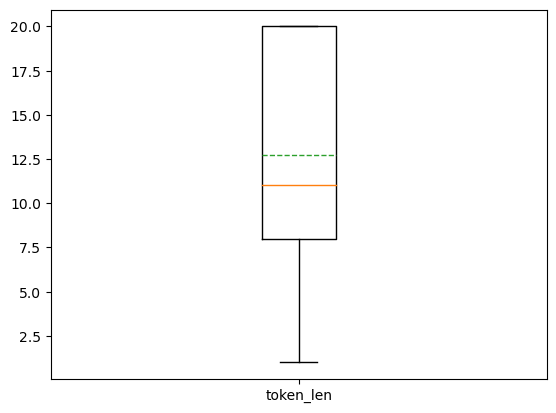

In [39]:
import matplotlib.pyplot as plt
plt.figure()
plt.boxplot(text_len, labels=['token_len'], meanline= True, showmeans=True)
plt.show()

- 이정도면 단어수가 아주 적은 경우는 제거해도 될듯?(일단 그냥)

In [40]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

tokenizer = Tokenizer()

In [41]:
tokenizer.fit_on_texts(train_text)

In [42]:
len(tokenizer.word_index)

3396

자주 나타나지 않는 단어도 중요할 수  있으므로 전체 단어 사용.

In [47]:
# # 3. n회 이상 등장한 단어 필터링 (예: 2회 이상)
# min_count = 2
# filtered_words = {word: count for word, count in word_counts.items() if count >= min_count}

# # 4. 새로운 Tokenizer 생성
# filtered_tokenizer = Tokenizer()
# filtered_tokenizer.fit_on_texts(filtered_words.keys())

# # 5. 텍스트를 matrix로 변환
# data = filtered_tokenizer.texts_to_matrix(train_text, mode='binary')

# # 결과 확인
# print("필터링된 단어 수:", len(filtered_tokenizer.word_index))
# print("결과 데이터:", data)

In [50]:
vects = tokenizer.texts_to_matrix(train_text, mode='binary')
print(vects.shape)

(3298, 3397)


In [52]:
import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)

In [65]:
from keras.models import Sequential
from keras.layers import Input, Dense

model = Sequential()
model.add(Input(3397,))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [66]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                217472    
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 219,585
Trainable params: 219,585
Non-trainable params: 0
_________________________________________________________________


In [67]:
x_train, x_val, y_train, y_val = train_test_split(vects, train_label, stratify=train_label, random_state=1111)
x_train.shape, y_train.shape, x_val.shape, y_val.shape

((2473, 3397), (2473,), (825, 3397), (825,))

In [68]:
x_train.dtype, y_train.dtype, x_val.dtype, y_val.dtype

(dtype('float64'), dtype('int64'), dtype('float64'), dtype('int64'))

In [69]:
model.compile(
    loss = 'binary_crossentropy',
    optimizer='adam',
    metrics=['acc']
)

In [70]:
history = model.fit(
    x=x_train,
    y=y_train,
    epochs=10,
    batch_size=128,
    validation_data=(x_val,y_val)
)

Epoch 1/10
20/20 [==============================] - 1s 18ms/step - loss: 0.5389 - acc: 0.7942 - val_loss: 0.3700 - val_acc: 0.9200
Epoch 2/10
20/20 [==============================] - 0s 12ms/step - loss: 0.2596 - acc: 0.9628 - val_loss: 0.1740 - val_acc: 0.9685
Epoch 3/10
20/20 [==============================] - 0s 13ms/step - loss: 0.1018 - acc: 0.9903 - val_loss: 0.0845 - val_acc: 0.9745
Epoch 4/10
20/20 [==============================] - 0s 11ms/step - loss: 0.0393 - acc: 0.9931 - val_loss: 0.0636 - val_acc: 0.9770
Epoch 5/10
20/20 [==============================] - 0s 11ms/step - loss: 0.0193 - acc: 0.9972 - val_loss: 0.0587 - val_acc: 0.9806
Epoch 6/10
20/20 [==============================] - 0s 11ms/step - loss: 0.0107 - acc: 0.9992 - val_loss: 0.0566 - val_acc: 0.9794
Epoch 7/10
20/20 [==============================] - 0s 10ms/step - loss: 0.0068 - acc: 1.0000 - val_loss: 0.0565 - val_acc: 0.9794
Epoch 8/10
20/20 [==============================] - 0s 10ms/step - loss: 0.0049 - a

In [71]:
path

'D:\\elice_python\\GAS_5\\pytest\\datasets\\불법 대부업 데이터'

In [74]:
model.save(os.path.join(path,'models','fake_loan.keras'))
import pickle
with open(os.path.join(path,'models','fake_loan_tokenizer.pickle'), 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [75]:
history_dict = history.history

acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

print(f'Train acc. of each epoch : {np.round(acc,3)}')
print(f'Valid acc. of each epoch : {np.round(val_acc,3)}')

Train acc. of each epoch : [0.794 0.963 0.99  0.993 0.997 0.999 1.    1.    1.    1.   ]
Valid acc. of each epoch : [0.92  0.968 0.975 0.977 0.981 0.979 0.979 0.979 0.978 0.979]


range(1, 11)


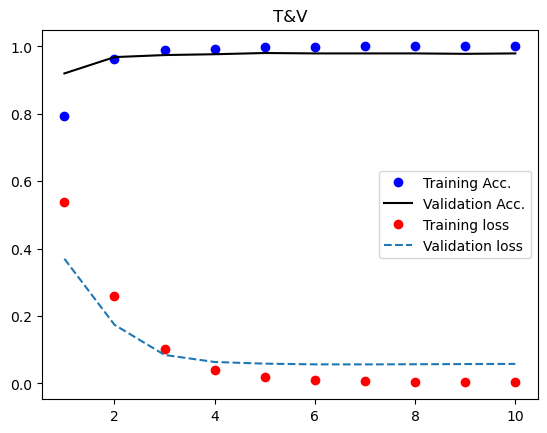

In [81]:
import matplotlib.pyplot as plt

epochs = range(1, len(acc)+1)
print(epochs)

plt.plot(epochs, acc, 'bo', label = 'Training Acc.')
plt.plot(epochs, val_acc, 'black', label = 'Validation Acc.')
plt.plot(epochs, loss, 'ro', label = 'Training loss')
plt.plot(epochs, val_loss, '--', label = 'Validation loss')
plt.title('T&V')
plt.legend()
plt.show()

### Load

In [82]:
import os
from keras.models import load_model
model_path = os.path.join(path,'models')
os.chdir(model_path)

In [83]:
loaded_model = load_model('fake_loan.keras')
print(loaded_model)

In [84]:
import pickle
with open('fake_loan_tokenizer.pickle', 'rb') as handle:
    loaded_tokenizer = pickle.load(handle)
loaded_tokenizer

In [85]:
x_test = loaded_tokenizer.texts_to_matrix(test_text)
x_test.shape

(1100, 3397)

In [86]:
test_eval = loaded_model.evaluate(x_test, test_label)

35/35 [==============================] - 0s 3ms/step - loss: 0.0523 - acc: 0.9818


### 한 개 데이터 예측

In [87]:
text = '24시간 상시 대기. 전화 즉시 바로 연결. 5분 안에 최대 500만원'

In [88]:
import rhinoMorph
rn = rhinoMorph.startRhino()

filepath:  C:\Users\Caelu\anaconda3\envs\tf_gpu\Lib\site-packages
classpath:  C:\Users\Caelu\anaconda3\envs\tf_gpu\Lib\site-packages\rhinoMorph/lib/rhino.jar
RHINO started!


In [100]:
text_morphed = rhinoMorph.onlyMorph_list(rn, text, pos=['NNG', 'NNP', 'VV', 'VA', 'XR', 'IC', 'MM', 'MAG', 'MAJ'], eomi=False )

In [101]:
text = ' '.join(text_morphed)
print(text)

시간 상시 대기 전화 즉시 바로 연결 안 최대


In [105]:
sample = loaded_tokenizer.texts_to_matrix([text])
sample.shape

(1, 3397)

- 주의! text를 리스트로 감싸서 전달해야함!

In [108]:
prediction = loaded_model.predict(sample)
prediction

1/1 [==============================] - 0s 54ms/step


array([[0.4116942]], dtype=float32)

## 2. 성별 예측 모델 생성
- `감성대화말뭉치(최종데이터)_Training.CSV` 파일을 열고,
- ‘성별, 사람문장1’로 train 데이터를, ‘성별, 사람문장2’로 test 데이터를 만드시오
- 문제가 있는 행은 적절히 처리하시오
- 형태소 분석을 진행하시오
- 남녀 성별을 예측하는 모델을 train 데이터로 학습하여 만들어 test 데이터로 예측하시오
- train 데이터의 10%로 validation 데이터를 만드시오
- 모델 저장 및 1개 데이터 예측 과정은 생략

In [6]:
import os
import pandas as pd

path = 'D:\elice_python\GAS_5\pytest\datasets\감성대화말뭉치'

os.chdir(path)

In [7]:
data = pd.read_csv('감성대화말뭉치(최종데이터)_Training.csv', header=0, encoding='cp949')
data.head(1)

C:\Users\Caelu\AppData\Local\Temp\ipykernel_46456\858027503.py:1: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('감성대화말뭉치(최종데이터)_Training.csv', header=0, encoding='cp949')


,번호,연령,성별,상황키워드,신체질환,감정_대분류,감정_소분류,사람문장1,시스템응답1,사람문장2,시스템응답2,사람문장3,시스템응답3,사람문장4,시스템응답4
0,44164.0,청년,남성,"연애, 결혼, 출산",해당없음,기쁨,신이 난,아내가 드디어 출산하게 되어서 정말 신이 나.,아내분이 출산을 하시는군요. 정말 축하드려요.,아 지금 정말 신이 나.,잘 된 일이네요.,아기가 점점 클게 벌써 기대가 되네. 내가 많이 놀아줘야지.,좋은 아빠가 되실 거 같아요. 진심으로 축하드려요.,NaN,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69218 entries, 0 to 69217
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   번호      40879 non-null  float64
 1   연령      40879 non-null  object 
 2   성별      40879 non-null  object 
 3   상황키워드   40879 non-null  object 
 4   신체질환    40879 non-null  object 
 5   감정_대분류  40879 non-null  object 
 6   감정_소분류  40879 non-null  object 
 7   사람문장1   40879 non-null  object 
 8   시스템응답1  40879 non-null  object 
 9   사람문장2   40879 non-null  object 
 10  시스템응답2  40879 non-null  object 
 11  사람문장3   31059 non-null  object 
 12  시스템응답3  31059 non-null  object 
 13  사람문장4   1472 non-null   object 
 14  시스템응답4  1362 non-null   object 
dtypes: float64(1), object(14)
memory usage: 7.9+ MB


In [4]:
data.성별.unique()

array(['남성', '여성', nan], dtype=object)

In [8]:
data.dropna(subset=['성별','사람문장1','사람문장2'], inplace=True)

In [9]:
data.성별.unique()

array(['남성', '여성'], dtype=object)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40879 entries, 0 to 40878
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   번호      40879 non-null  float64
 1   연령      40879 non-null  object 
 2   성별      40879 non-null  object 
 3   상황키워드   40879 non-null  object 
 4   신체질환    40879 non-null  object 
 5   감정_대분류  40879 non-null  object 
 6   감정_소분류  40879 non-null  object 
 7   사람문장1   40879 non-null  object 
 8   시스템응답1  40879 non-null  object 
 9   사람문장2   40879 non-null  object 
 10  시스템응답2  40879 non-null  object 
 11  사람문장3   31059 non-null  object 
 12  시스템응답3  31059 non-null  object 
 13  사람문장4   1472 non-null   object 
 14  시스템응답4  1362 non-null   object 
dtypes: float64(1), object(14)
memory usage: 5.0+ MB


In [10]:
data['성별'] = data['성별'].replace({'남성': 0, '여성': 1})

In [11]:
data.성별.unique()

array([0, 1], dtype=int64)

In [19]:
train_text = data.사람문장1
test_text = data.사람문장2

train_text.shape, test_text.shape

((40879,), (40879,))

In [21]:
import rhinoMorph
rn = rhinoMorph.startRhino()

filepath:  C:\Users\Caelu\anaconda3\envs\tf_gpu\Lib\site-packages
classpath:  C:\Users\Caelu\anaconda3\envs\tf_gpu\Lib\site-packages\rhinoMorph/lib/rhino.jar
RHINO started!


In [12]:
train_data_sample = rhinoMorph.onlyMorph_list(
    rn, 
    train_text[0],
    pos=['NNG','NNP','JKS', 'MAG','XR','XSV','VV','EC',
         'MAG', 'VA', 'IC', 'MM', 'MAJ'], 
    eomi=False
    )

train_data_sample

['아내', '가', '드디어', '출산', '하', '게', '되', '어서', '정말', '신', '이', '나']

In [13]:
train_data = [' '.join(rhinoMorph.onlyMorph_list(
    rn, 
    sample,
    pos=['NNG','NNP','JKS', 'MAG','XR','XSV','VV','EC',
         'MAG', 'VA', 'IC', 'MM', 'MAJ'], 
    eomi=False
    )) for sample in train_text]

In [14]:
train_data[:2]

['아내 가 드디어 출산 하 게 되 어서 정말 신 이 나', '당뇨 합병증 어야 약이 가지 가 넘어가 니까 스트레스']

In [22]:
test_data = [' '.join(rhinoMorph.onlyMorph_list(
    rn, 
    sample,
    pos=['NNG','NNP','JKS', 'MAG','XR','XSV','VV','EC',
         'MAG', 'VA', 'IC', 'MM', 'MAJ'], 
    eomi=False
    )) for sample in test_text]

test_data[:2]

['아 지금 정말 신 이 나', '건강 하 때 관리 좀 잘 하 하 생각 이 들 더라고']

In [16]:
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=9000)
tokenizer.fit_on_texts(train_data)

In [17]:
len(tokenizer.index_word)

9918

In [18]:
import numpy as np
text_len = [len(line.split(' ')) for line in train_data]
print("최소길이: ", np.min(text_len)) 
print("최대길이: ", np.max(text_len)) 
print("평균길이: ", np.round(np.mean(text_len), 1)) 
print("중위수길이: ", np.median(text_len)) 
print("구간별 최대 길이: ", np.percentile(text_len, [0, 25, 50, 75, 90, 100]))
# - (percentile) 사용할 단어 개수는 90%를 담을 수 있는 20개로 한다
print("최소길이 문장: ", train_data[np.argmin(text_len)])
print("최대길이 문장: ", train_data[np.argmax(text_len)])

최소길이:  1
최대길이:  55
평균길이:  12.3
중위수길이:  12.0
구간별 최대 길이:  [ 1.  9. 12. 15. 18. 55.]
최소길이 문장:  속이
최대길이 문장:  아 결국 친구 빌리 어 돈 떼이 게 생기 어 급전 이 필요 하 다고 부탁 하 아서 여러 차례 빌리 어 줄 게 벌써 이 넘 는데 이 지나 갚 생각 알 하 같 아 연락 하 더니 전화번호 바꾸 고 잠적 하 아 고 이 친구 당하 사람 이 이 아니야 아주 상습범


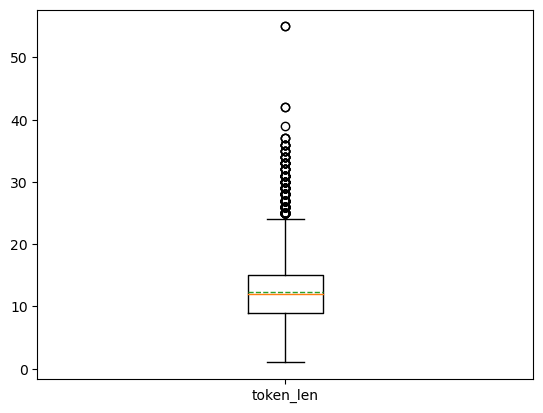

In [19]:
import matplotlib.pyplot as plt
plt.figure()
plt.boxplot(text_len, labels=['token_len'], meanline= True, showmeans=True)
plt.show()

In [20]:
x = tokenizer.texts_to_matrix(train_data)
y = data.성별
x.shape, y.shape

((40879, 9000), (40879,))

In [21]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x, y, 
                                                  stratify=y, 
                                                  train_size=0.9,
                                                  test_size=0.1, 
                                                  random_state=42)

In [22]:
x_train.shape, x_val.shape

((36791, 9000), (4088, 9000))

In [23]:
from keras.models import Sequential
from keras.layers import Input, Dense

model = Sequential()

model.add(Input(shape=(9000,)))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                576064    
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 578,177
Trainable params: 578,177
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['acc'],
)

In [26]:
import os
from keras.callbacks import ModelCheckpoint

# 모델 저장 경로 설정
path = os.getcwd()  # 현재 디렉토리로 설정
model_dir = os.path.join(path, 'models')
os.makedirs(model_dir, exist_ok=True)  # 디렉토리가 없으면 생성
model_path = os.path.join(model_dir, 'gender_cls.keras')

checkpointer = ModelCheckpoint(
    filepath=model_path,
    monitor='val_loss',
    verbose=1,
    save_best_only=True
)

# # 데이터 제너레이터 정의
# def data_generator(X, y, batch_size):
#     sample_count = X.shape[0]
#     while True:  # 무한 반복 생성기
#         for offset in range(0, sample_count, batch_size):
#             batch_X = X[offset:offset + batch_size]
#             batch_y = y[offset:offset + batch_size]
#             print(batch_X.shape)
#             # batch_X의 형상이 (batch_size, input_dim) 형식이어야 합니다.
#             # 예: (128, 9920) - 128개의 샘플, 각 샘플은 9920차원의 벡터
#             yield batch_X, batch_y

# # 제너레이터를 모델에 적용
# batch_size = 128
# train_generator = data_generator(x_train, y_train, batch_size)

# 모델 훈련
history = model.fit(
        x_train,
        y_train,
        batch_size=64,
        # train_generator,
        # steps_per_epoch=len(x_train) // batch_size,
        epochs=10,
        callbacks=[checkpointer],
        validation_data=(x_val, y_val)  # 검증 데이터 제공
)


Epoch 1/10
574/575 [============================>.] - ETA: 0s - loss: 0.6182 - acc: 0.6331
Epoch 1: val_loss improved from inf to 0.58737, saving model to D:\elice_python\GAS_5\pytest\datasets\감성대화말뭉치\models\gender_cls.keras
575/575 [==============================] - 4s 5ms/step - loss: 0.6182 - acc: 0.6331 - val_loss: 0.5874 - val_acc: 0.6641
Epoch 2/10
567/575 [============================>.] - ETA: 0s - loss: 0.5247 - acc: 0.7209
Epoch 2: val_loss improved from 0.58737 to 0.58123, saving model to D:\elice_python\GAS_5\pytest\datasets\감성대화말뭉치\models\gender_cls.keras
575/575 [==============================] - 2s 4ms/step - loss: 0.5244 - acc: 0.7213 - val_loss: 0.5812 - val_acc: 0.6734
Epoch 3/10
574/575 [============================>.] - ETA: 0s - loss: 0.4148 - acc: 0.8004
Epoch 3: val_loss did not improve from 0.58123
575/575 [==============================] - 2s 4ms/step - loss: 0.4149 - acc: 0.8003 - val_loss: 0.6296 - val_acc: 0.6705
Epoch 4/10
568/575 [=========================

In [24]:
x_test = tokenizer.texts_to_matrix(test_data)
x_test.shape

(40879, 9000)

In [31]:
path

'D:\\elice_python\\GAS_5\\pytest\\datasets\\감성대화말뭉치'

In [33]:
import pickle
with open(os.path.join(path,'models','tokenizer.pickle'), 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [26]:
with open(os.path.join(path,'models','x_test.pickle'), 'wb') as handle:
    pickle.dump(x_test, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [3]:
path = 'D:\\elice_python\\GAS_5\\pytest\\datasets\\감성대화말뭉치'

In [27]:
from keras.models import load_model
import os
import pickle
loaded_model = load_model(os.path.join(path, 'models', 'gender_cls.keras'))
with open(os.path.join(path,'models','tokenizer.pickle'), 'rb') as handle:
    loaded_tokenizer = pickle.load(handle)
with open(os.path.join(path,'models','x_test.pickle'), 'rb') as handle:
    x_test = pickle.load(handle)
y = data.성별


In [29]:
x_test.shape

(40879, 9000)

In [30]:
loaded_model.evaluate(x_test,y)

1278/1278 [==============================] - 4s 2ms/step - loss: 0.6783 - acc: 0.5904


[0.6783235669136047, 0.5904253721237183]